In [1]:
from commonfunctions import *

In [2]:
#cell for pictures insertion

rose=io.imread("Q3.jpg")
lana=io.imread("Q4.jpg")
bird=io.imread("bird.jpg")
f2=io.imread("f2.jpg")
f3=io.imread("f3.jpg")

In [3]:
def white_patch(image, percentile=90):
    """
    White balance image using White patch algorithm
    Parameters
    ----------
    percentile : integer, optional
                  Percentile value to consider as channel maximum
    clip: any value less than 0 becomes zero and any value bigger than 1 is 1

    """
    white_patch_image = img_as_ubyte((image / np.percentile(image,percentile)).clip(0, 1))
    return white_patch_image

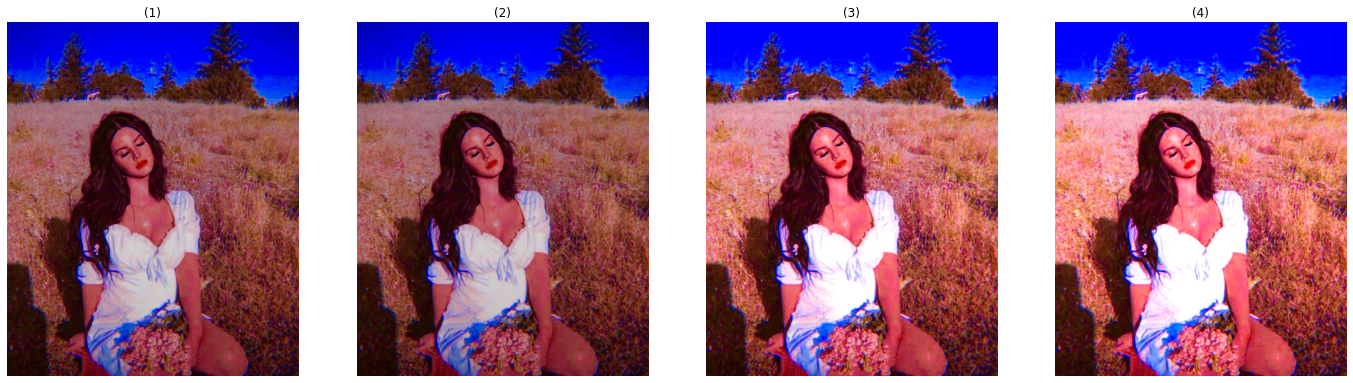

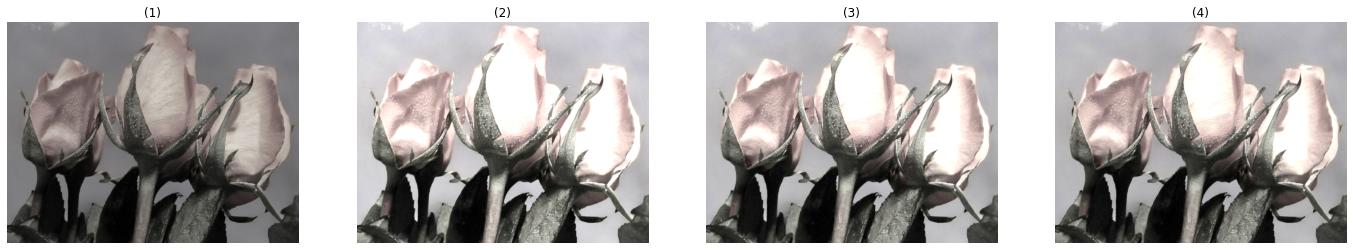

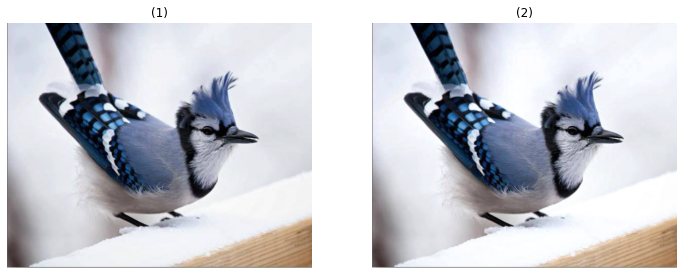

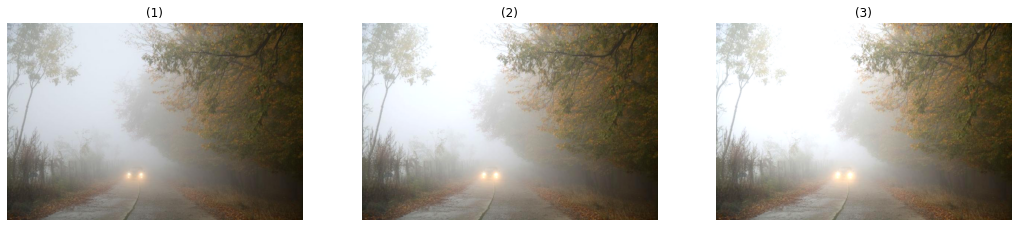

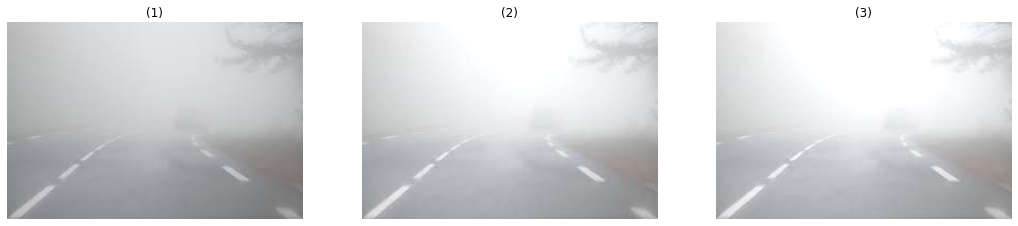

In [4]:

lanaeditwb5=white_patch(lana, 85)
lanaeditwb6=white_patch(lana, 90)
lanaeditwb7=white_patch(lana, 100)
roseeditwb5=white_patch(rose, 85)
roseeditwb6=white_patch(rose, 90)
roseeditwb7=white_patch(rose, 92)
birdeditwb7=white_patch(bird, 92)

show_images([lana, lanaeditwb7, lanaeditwb6, lanaeditwb5])
show_images([rose, roseeditwb5, roseeditwb6, roseeditwb7])
show_images([bird, birdeditwb7])

f2edit1=white_patch(f2, 90)
f2edit2=white_patch(f2, 80)
f2edit3=white_patch(f2, 70)
f3edit1=white_patch(f3, 90)
f3edit2=white_patch(f3, 80)
f3edit3=white_patch(f3, 70)
show_images([f2, f2edit1, f2edit2])
show_images([f3, f3edit1, f3edit2])

In [5]:
def gray_world(image):
    """
    White balance image using Gray-world algorithm
    
    """
    grey=io.imread("grey.png")

    image_grayworld = ((image * (grey.mean() / image.mean())).clip(0,255).astype(int))
                      
                
    
    if image.shape[2] == 4:
        image_grayworld[:,:,3] = 255
    return image_grayworld


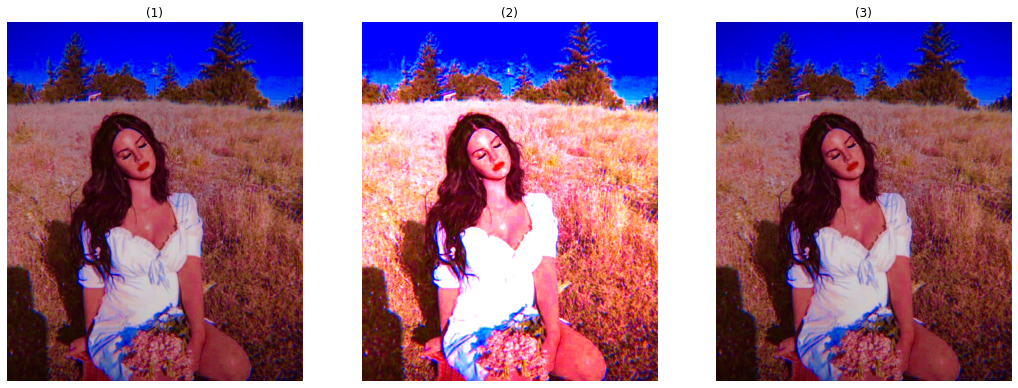

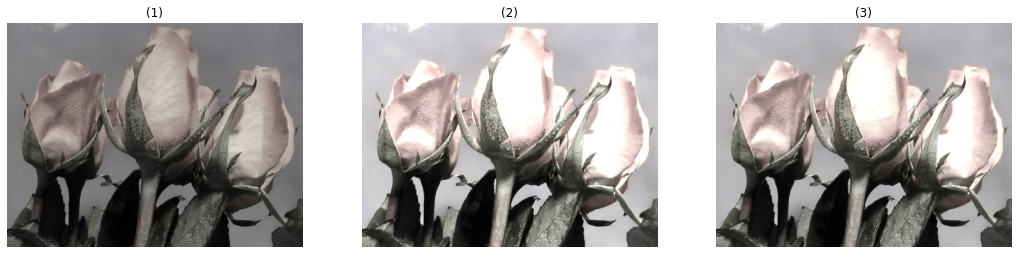

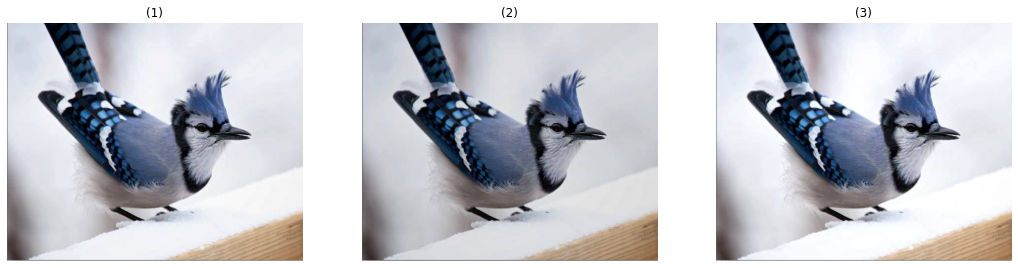

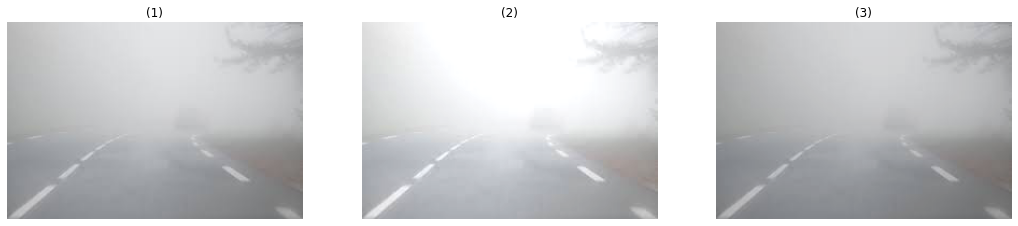

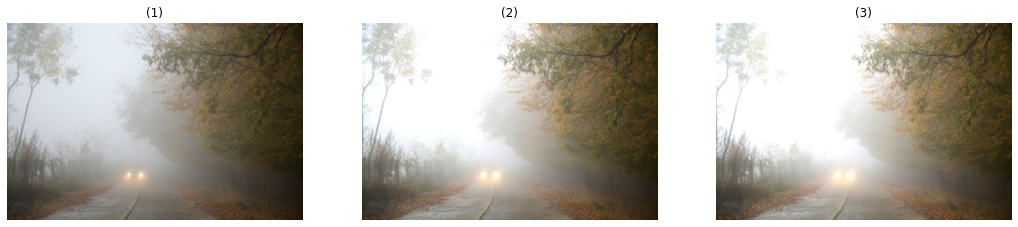

In [6]:

lanaeditgr=gray_world(lana)
roseeditgr=gray_world(rose)
birdeditgr=gray_world(bird)
show_images([lana, lanaeditgr, lanaeditwb7])
show_images([rose, roseeditgr, roseeditwb7])
show_images([bird, birdeditgr, birdeditwb7])

f3editgr=gray_world(f3)
f2editgr=gray_world(f2)
show_images([f3, f3edit2, f3editgr])
show_images([f2, f2edit2, f2editgr])

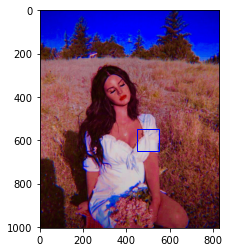

In [7]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.imshow(lana)
ax.add_patch(Rectangle((450, 550), 100, 100, edgecolor='b', facecolor='none'));

In [8]:
def ground_truth(image, x, y, mode='mean'):   
    """
    White balance image using Ground-truth algorithm
    Parameters
    ----------
    x & y : image patch starting dimensions 
    
    mode : mean or max, optional
          Adjust mean or max of each channel to match patch
    """
    image_patch = image[x:x+100,y:y+100]
    
    if mode == 'mean':
        image_gt = ((image * (image_patch.mean() /image.mean(axis=(0,1)))).clip(0, 255).astype(int))
                       
                   
    if mode == 'max':
        image_gt = ((image * 1.0 / image_patch.max(axis=(0,1))).clip(0, 1))
                    
    
    if image.shape[2] == 4:
        image_gt[:,:,3] = 255
    return image_gt

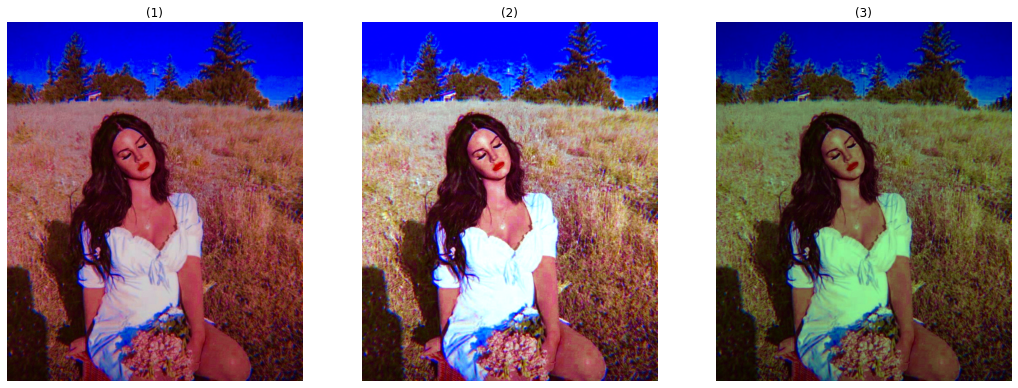

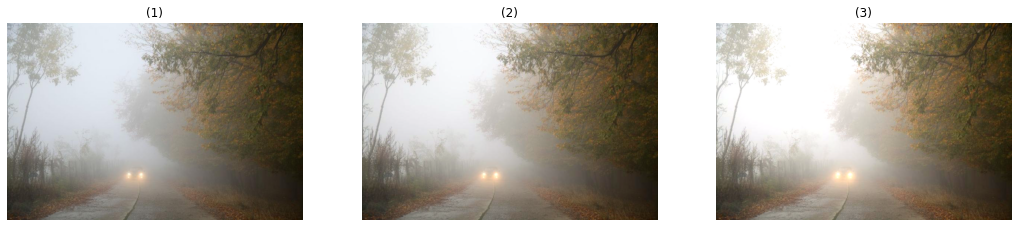

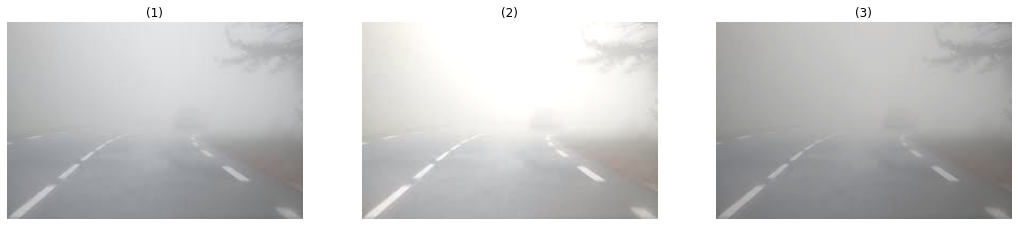

In [9]:
show_images([lana, ground_truth(lana, 650, 550, 'max'), ground_truth(lana, 650, 550, 'mean')])
show_images([f2, ground_truth(f2, 100, 100, 'max'), ground_truth(f2, 300, 300, 'max')])
show_images([f3, ground_truth(f3, 100, 100, 'max'), ground_truth(f3, 100, 100, 'mean')])